In [ ]:
import torchvision.transforms as transforms
import torchvision.datasets as datasets
import matplotlib.pyplot as plt
import torch

In [ ]:
train_data = datasets.FashionMNIST(root='/', train=True, transform=transforms.Compose([transforms.PILToTensor(),]), download=True)

  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting /FashionMNIST/raw/train-images-idx3-ubyte.gz to /FashionMNIST/raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting /FashionMNIST/raw/train-labels-idx1-ubyte.gz to /FashionMNIST/raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting /FashionMNIST/raw/t10k-images-idx3-ubyte.gz to /FashionMNIST/raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting /FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to /FashionMNIST/raw



In [ ]:
train_data

Dataset FashionMNIST
    Number of datapoints: 60000
    Root location: /
    Split: Train
    StandardTransform
Transform: Compose(
               PILToTensor()
           )

In [ ]:
val_data = datasets.FashionMNIST(root='./data', train=False, transform=transforms.Compose([transforms.PILToTensor(),]), download = True)

  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting ./data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting ./data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting ./data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting ./data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



In [ ]:
val_data

Dataset FashionMNIST
    Number of datapoints: 10000
    Root location: ./data
    Split: Test
    StandardTransform
Transform: Compose(
               PILToTensor()
           )

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler
from tqdm.notebook import tqdm

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [ ]:
class FFN1(torch.nn.Module):
  def __init__(self):
    super().__init__()
    self.layer1 = torch.nn.Linear(784, 256)
    self.layer2 = torch.nn.Linear(256, 10)

  def forward(self, x):
    x = x.view(x.shape[0], -1)
    x = torch.nn.ReLU()(self.layer1(x))
    x = torch.nn.Sigmoid()(self.layer2(x))
    return x

In [ ]:
class FFN2(torch.nn.Module):
  def __init__(self):
    super().__init__()
    self.layer1 = torch.nn.Linear(784, 203)
    self.layer2 = torch.nn.Linear(203, 203)
    self.layer3 = torch.nn.Linear(203, 10)

  def forward(self, x):
    x = x.view(x.shape[0], -1)
    x = torch.nn.ReLU()(self.layer1(x))
    x = torch.nn.ReLU()(self.layer2(x))
    x = torch.nn.Sigmoid()(self.layer3(x))
    return x

In [ ]:
class FFN3(torch.nn.Module):
  def __init__(self):
    super().__init__()
    self.layer1 = torch.nn.Linear(784, 176)
    self.layer2 = torch.nn.Linear(176, 176)
    self.layer3 = torch.nn.Linear(176, 176)
    self.layer4 = torch.nn.Linear(176, 10)

  def forward(self, x):
    x = x.view(x.shape[0], -1)
    x = torch.nn.ReLU()(self.layer1(x))
    x = torch.nn.ReLU()(self.layer2(x))
    x = torch.nn.ReLU()(self.layer3(x))
    x = torch.nn.Sigmoid()(self.layer4(x))
    return x

In [ ]:
def train_model(FFN, lr=0, batch_size = 8, momentum=0, epochs = 100):
  train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, shuffle=True, num_workers=0, pin_memory=False)
  model = FFN().to(device)
  loss_function = torch.nn.CrossEntropyLoss()
  optimizer = torch.optim.SGD(model.parameters(), lr = lr, momentum = momentum)
  total_loss, acc = list(), list()
  for epoch in range(epochs):
    print("\n\nEpoch:", epoch+1)
    batch_loss, batch_preds, batch_target = 0, list(), list()
    for x, y in tqdm(train_loader, total = len(train_loader)):
      x, y = x.to(device), y.to(device)
      optimizer.zero_grad()
      preds = model.forward(x.float())
      loss = loss_function(preds, y.to(torch.int64))
      loss.backward()
      optimizer.step()
      batch_loss += loss.item()
      batch_preds.extend(np.argmax(preds.cpu().detach().numpy(), axis=1))
      batch_target.extend(y.cpu().detach().numpy())

    total_loss.append(batch_loss/len(train_loader))

    acc.append(accuracy_score(batch_target, batch_preds))
    print("Loss:", total_loss[-1], "\tAcc:", acc[-1])
  return total_loss, model

In [ ]:
totloss1, totloss2, totloss3 = list(), list(), list()
lr=0.0001
for i in range(5):
  t, m = train_model(FFN = FFN1, lr=lr, batch_size=64, momentum = 0.9, epochs = 20)
  totloss1.append(t)
  lr = lr*10



Epoch: 1


  0%|          | 0/938 [00:00<?, ?it/s]

Loss: 1.9849044353977194 	Acc: 0.38088333333333335


Epoch: 2


  0%|          | 0/938 [00:00<?, ?it/s]

Loss: 1.8506444475289856 	Acc: 0.5353


Epoch: 3


  0%|          | 0/938 [00:00<?, ?it/s]

Loss: 1.8281024126355836 	Acc: 0.5937333333333333


Epoch: 4


  0%|          | 0/938 [00:00<?, ?it/s]

Loss: 1.7587680955177176 	Acc: 0.6606666666666666


Epoch: 5


  0%|          | 0/938 [00:00<?, ?it/s]

Loss: 1.7396567528690103 	Acc: 0.6749


Epoch: 6


  0%|          | 0/938 [00:00<?, ?it/s]

Loss: 1.7339756404921445 	Acc: 0.6793833333333333


Epoch: 7


  0%|          | 0/938 [00:00<?, ?it/s]

Loss: 1.729553638999142 	Acc: 0.6820166666666667


Epoch: 8


  0%|          | 0/938 [00:00<?, ?it/s]

Loss: 1.7256214759751423 	Acc: 0.6853166666666667


Epoch: 9


  0%|          | 0/938 [00:00<?, ?it/s]

Loss: 1.722993879048809 	Acc: 0.6888


Epoch: 10


  0%|          | 0/938 [00:00<?, ?it/s]

Loss: 1.7208869806739058 	Acc: 0.6897


Epoch: 11


  0%|          | 0/938 [00:00<?, ?it/s]

Loss: 1.7186752931395572 	Acc: 0.6916


Epoch: 12


  0%|          | 0/938 [00:00<?, ?it/s]

Loss: 1.716978158142521 	Acc: 0.6921666666666667


Epoch: 13


  0%|          | 0/938 [00:00<?, ?it/s]

Loss: 1.7152486406663843 	Acc: 0.6935666666666667


Epoch: 14


  0%|          | 0/938 [00:00<?, ?it/s]

Loss: 1.7135395322527205 	Acc: 0.6962833333333334


Epoch: 15


  0%|          | 0/938 [00:00<?, ?it/s]

Loss: 1.7123629388524526 	Acc: 0.6973166666666667


Epoch: 16


  0%|          | 0/938 [00:00<?, ?it/s]

Loss: 1.7110269772472666 	Acc: 0.69765


Epoch: 17


  0%|          | 0/938 [00:00<?, ?it/s]

Loss: 1.7094297804303769 	Acc: 0.6998833333333333


Epoch: 18


  0%|          | 0/938 [00:00<?, ?it/s]

Loss: 1.708663144726743 	Acc: 0.7006


Epoch: 19


  0%|          | 0/938 [00:00<?, ?it/s]

Loss: 1.7073616662513473 	Acc: 0.7016833333333333


Epoch: 20


  0%|          | 0/938 [00:00<?, ?it/s]

Loss: 1.7065795764231733 	Acc: 0.7031166666666666


Epoch: 1


  0%|          | 0/938 [00:00<?, ?it/s]

Loss: 1.8615988879315635 	Acc: 0.50285


Epoch: 2


  0%|          | 0/938 [00:00<?, ?it/s]

Loss: 1.8117953371137445 	Acc: 0.5681


Epoch: 3


  0%|          | 0/938 [00:00<?, ?it/s]

Loss: 1.804385618868667 	Acc: 0.5822166666666667


Epoch: 4


  0%|          | 0/938 [00:00<?, ?it/s]

Loss: 1.7594096603424056 	Acc: 0.6424833333333333


Epoch: 5


  0%|          | 0/938 [00:00<?, ?it/s]

Loss: 1.7153909369064038 	Acc: 0.68285


Epoch: 6


  0%|          | 0/938 [00:00<?, ?it/s]

Loss: 1.7096084388080182 	Acc: 0.6936166666666667


Epoch: 7


  0%|          | 0/938 [00:00<?, ?it/s]

Loss: 1.705863618647366 	Acc: 0.7096


Epoch: 8


  0%|          | 0/938 [00:00<?, ?it/s]

Loss: 1.704645345587212 	Acc: 0.70915


Epoch: 9


  0%|          | 0/938 [00:00<?, ?it/s]

Loss: 1.702694028679496 	Acc: 0.7095


Epoch: 10


  0%|          | 0/938 [00:00<?, ?it/s]

Loss: 1.7026734044556933 	Acc: 0.7064666666666667


Epoch: 11


  0%|          | 0/938 [00:00<?, ?it/s]

Loss: 1.6999437582772423 	Acc: 0.7142


Epoch: 12


  0%|          | 0/938 [00:00<?, ?it/s]

Loss: 1.6961744554769764 	Acc: 0.72145


Epoch: 13


  0%|          | 0/938 [00:00<?, ?it/s]

Loss: 1.652107728315569 	Acc: 0.7352833333333333


Epoch: 14


  0%|          | 0/938 [00:00<?, ?it/s]

Loss: 1.6441945373884905 	Acc: 0.74205


Epoch: 15


  0%|          | 0/938 [00:00<?, ?it/s]

Loss: 1.6394209960884631 	Acc: 0.74885


Epoch: 16


  0%|          | 0/938 [00:00<?, ?it/s]

Loss: 1.639179877762093 	Acc: 0.7472833333333333


Epoch: 17


  0%|          | 0/938 [00:00<?, ?it/s]

Loss: 1.6361552637014816 	Acc: 0.7547333333333334


Epoch: 18


  0%|          | 0/938 [00:00<?, ?it/s]

Loss: 1.634940159473338 	Acc: 0.75225


Epoch: 19


  0%|          | 0/938 [00:00<?, ?it/s]

Loss: 1.6335091941646422 	Acc: 0.7527166666666667


Epoch: 20


  0%|          | 0/938 [00:00<?, ?it/s]

Loss: 1.631134366557034 	Acc: 0.7555666666666667


Epoch: 1


  0%|          | 0/938 [00:00<?, ?it/s]

Loss: 2.1962897429334074 	Acc: 0.26406666666666667


Epoch: 2


  0%|          | 0/938 [00:00<?, ?it/s]

Loss: 2.1294777615746456 	Acc: 0.2813


Epoch: 3


  0%|          | 0/938 [00:00<?, ?it/s]

Loss: 2.024155398548793 	Acc: 0.30415


Epoch: 4


  0%|          | 0/938 [00:00<?, ?it/s]

Loss: 1.9887616788146338 	Acc: 0.2870666666666667


Epoch: 5


  0%|          | 0/938 [00:00<?, ?it/s]

Loss: 2.0343293029108027 	Acc: 0.27686666666666665


Epoch: 6


  0%|          | 0/938 [00:00<?, ?it/s]

Loss: 1.9846207541443392 	Acc: 0.30628333333333335


Epoch: 7


  0%|          | 0/938 [00:00<?, ?it/s]

Loss: 2.0124649589758183 	Acc: 0.26548333333333335


Epoch: 8


  0%|          | 0/938 [00:00<?, ?it/s]

Loss: 2.0257170321082256 	Acc: 0.2509


Epoch: 9


  0%|          | 0/938 [00:00<?, ?it/s]

Loss: 1.9797987921405702 	Acc: 0.30555


Epoch: 10


  0%|          | 0/938 [00:00<?, ?it/s]

Loss: 1.9906996029780617 	Acc: 0.28368333333333334


Epoch: 11


  0%|          | 0/938 [00:00<?, ?it/s]

Loss: 1.9704011333014158 	Acc: 0.2967


Epoch: 12


  0%|          | 0/938 [00:00<?, ?it/s]

Loss: 1.9821681563279776 	Acc: 0.2826


Epoch: 13


  0%|          | 0/938 [00:00<?, ?it/s]

Loss: 1.9821193927386676 	Acc: 0.3169666666666667


Epoch: 14


  0%|          | 0/938 [00:00<?, ?it/s]

Loss: 1.9695474458401645 	Acc: 0.35228333333333334


Epoch: 15


  0%|          | 0/938 [00:00<?, ?it/s]

Loss: 2.0129645912886174 	Acc: 0.2817


Epoch: 16


  0%|          | 0/938 [00:00<?, ?it/s]

Loss: 1.971856273440664 	Acc: 0.32188333333333335


Epoch: 17


  0%|          | 0/938 [00:00<?, ?it/s]

Loss: 1.9617681481690803 	Acc: 0.33816666666666667


Epoch: 18


  0%|          | 0/938 [00:00<?, ?it/s]

Loss: 1.9694202954072688 	Acc: 0.34355


Epoch: 19


  0%|          | 0/938 [00:00<?, ?it/s]

Loss: 1.9656858934776615 	Acc: 0.339


Epoch: 20


  0%|          | 0/938 [00:00<?, ?it/s]

Loss: 2.0006726746365966 	Acc: 0.26843333333333336


Epoch: 1


  0%|          | 0/938 [00:00<?, ?it/s]

Loss: 2.425066068736729 	Acc: 0.09998333333333333


Epoch: 2


  0%|          | 0/938 [00:00<?, ?it/s]

Loss: 2.425718885749134 	Acc: 0.1


Epoch: 3


  0%|          | 0/938 [00:00<?, ?it/s]

Loss: 2.425685570184102 	Acc: 0.1


Epoch: 4


  0%|          | 0/938 [00:00<?, ?it/s]

Loss: 2.4257855168791975 	Acc: 0.1


Epoch: 5


  0%|          | 0/938 [00:00<?, ?it/s]

Loss: 2.425702227966618 	Acc: 0.1


Epoch: 6


  0%|          | 0/938 [00:00<?, ?it/s]

Loss: 2.425685570184102 	Acc: 0.1


Epoch: 7


  0%|          | 0/938 [00:00<?, ?it/s]

Loss: 2.425685570184102 	Acc: 0.1


Epoch: 8


  0%|          | 0/938 [00:00<?, ?it/s]

Loss: 2.4257855168791975 	Acc: 0.1


Epoch: 9


  0%|          | 0/938 [00:00<?, ?it/s]

Loss: 2.425685570184102 	Acc: 0.1


Epoch: 10


  0%|          | 0/938 [00:00<?, ?it/s]

Loss: 2.425768858842504 	Acc: 0.1


Epoch: 11


  0%|          | 0/938 [00:00<?, ?it/s]

Loss: 2.425685570184102 	Acc: 0.1


Epoch: 12


  0%|          | 0/938 [00:00<?, ?it/s]

Loss: 2.4257355435316494 	Acc: 0.1


Epoch: 13


  0%|          | 0/938 [00:00<?, ?it/s]

Loss: 2.4257355435316494 	Acc: 0.1


Epoch: 14


  0%|          | 0/938 [00:00<?, ?it/s]

Loss: 2.425702227966618 	Acc: 0.1


Epoch: 15


  0%|          | 0/938 [00:00<?, ?it/s]

Loss: 2.4257355435316494 	Acc: 0.1


Epoch: 16


  0%|          | 0/938 [00:00<?, ?it/s]

Loss: 2.4256855699299242 	Acc: 0.1


Epoch: 17


  0%|          | 0/938 [00:00<?, ?it/s]

Loss: 2.425685570184102 	Acc: 0.1


Epoch: 18


  0%|          | 0/938 [00:00<?, ?it/s]

Loss: 2.4256689124015858 	Acc: 0.1


Epoch: 19


  0%|          | 0/938 [00:00<?, ?it/s]

Loss: 2.4256855699299242 	Acc: 0.1


Epoch: 20


  0%|          | 0/938 [00:00<?, ?it/s]

Loss: 2.4257522013141655 	Acc: 0.1


Epoch: 1


  0%|          | 0/938 [00:00<?, ?it/s]

Loss: 2.425665041276895 	Acc: 0.0999


Epoch: 2


  0%|          | 0/938 [00:00<?, ?it/s]

Loss: 2.4257688590966815 	Acc: 0.1


Epoch: 3


  0%|          | 0/938 [00:00<?, ?it/s]

Loss: 2.425752201059988 	Acc: 0.1


Epoch: 4


  0%|          | 0/938 [00:00<?, ?it/s]

Loss: 2.425702227966618 	Acc: 0.1


Epoch: 5


  0%|          | 0/938 [00:00<?, ?it/s]

Loss: 2.4257522013141655 	Acc: 0.1


Epoch: 6


  0%|          | 0/938 [00:00<?, ?it/s]

Loss: 2.425702227966618 	Acc: 0.1


Epoch: 7


  0%|          | 0/938 [00:00<?, ?it/s]

Loss: 2.4257688590966815 	Acc: 0.1


Epoch: 8


  0%|          | 0/938 [00:00<?, ?it/s]

Loss: 2.4256522546190697 	Acc: 0.1


Epoch: 9


  0%|          | 0/938 [00:00<?, ?it/s]

Loss: 2.425685570184102 	Acc: 0.1


Epoch: 10


  0%|          | 0/938 [00:00<?, ?it/s]

Loss: 2.4258021746617136 	Acc: 0.1


Epoch: 11


  0%|          | 0/938 [00:00<?, ?it/s]

Loss: 2.4257522013141655 	Acc: 0.1


Epoch: 12


  0%|          | 0/938 [00:00<?, ?it/s]

Loss: 2.425685570184102 	Acc: 0.1


Epoch: 13


  0%|          | 0/938 [00:00<?, ?it/s]

Loss: 2.4257522013141655 	Acc: 0.1


Epoch: 14


  0%|          | 0/938 [00:00<?, ?it/s]

Loss: 2.4257522013141655 	Acc: 0.1


Epoch: 15


  0%|          | 0/938 [00:00<?, ?it/s]

Loss: 2.425685570184102 	Acc: 0.1


Epoch: 16


  0%|          | 0/938 [00:00<?, ?it/s]

Loss: 2.4257355435316494 	Acc: 0.1


Epoch: 17


  0%|          | 0/938 [00:00<?, ?it/s]

Loss: 2.425668912147408 	Acc: 0.1


Epoch: 18


  0%|          | 0/938 [00:00<?, ?it/s]

Loss: 2.425735543277472 	Acc: 0.1


Epoch: 19


  0%|          | 0/938 [00:00<?, ?it/s]

Loss: 2.4256355968365537 	Acc: 0.1


Epoch: 20


  0%|          | 0/938 [00:00<?, ?it/s]

Loss: 2.425685570184102 	Acc: 0.1


In [ ]:
lr = 0.0001
for i in range(5):
  t, m = train_model(FFN = FFN2, lr=lr, batch_size=64, momentum = 0.9, epochs = 20)
  totloss2.append(t)
  lr=lr*10



Epoch: 1


  0%|          | 0/938 [00:00<?, ?it/s]

Loss: 1.8905463965971079 	Acc: 0.16268333333333335


Epoch: 2


  0%|          | 0/938 [00:00<?, ?it/s]

Loss: 1.7896498364172002 	Acc: 0.22013333333333332


Epoch: 3


  0%|          | 0/938 [00:00<?, ?it/s]

Loss: 1.7759502917718786 	Acc: 0.2437


Epoch: 4


  0%|          | 0/938 [00:00<?, ?it/s]

Loss: 1.768437674177735 	Acc: 0.26781666666666665


Epoch: 5


  0%|          | 0/938 [00:00<?, ?it/s]

Loss: 1.762194906470618 	Acc: 0.28923333333333334


Epoch: 6


  0%|          | 0/938 [00:00<?, ?it/s]

Loss: 1.7400385611601221 	Acc: 0.4413666666666667


Epoch: 7


  0%|          | 0/938 [00:00<?, ?it/s]

Loss: 1.6540805607208058 	Acc: 0.7733833333333333


Epoch: 8


  0%|          | 0/938 [00:00<?, ?it/s]

Loss: 1.6458159986335332 	Acc: 0.7785166666666666


Epoch: 9


  0%|          | 0/938 [00:00<?, ?it/s]

Loss: 1.641504797854149 	Acc: 0.7807666666666667


Epoch: 10


  0%|          | 0/938 [00:00<?, ?it/s]

Loss: 1.6386888052608921 	Acc: 0.7825


Epoch: 11


  0%|          | 0/938 [00:00<?, ?it/s]

Loss: 1.6360898260622898 	Acc: 0.7846833333333333


Epoch: 12


  0%|          | 0/938 [00:00<?, ?it/s]

Loss: 1.633739399503289 	Acc: 0.7875


Epoch: 13


  0%|          | 0/938 [00:00<?, ?it/s]

Loss: 1.632546970966274 	Acc: 0.7882666666666667


Epoch: 14


  0%|          | 0/938 [00:00<?, ?it/s]

Loss: 1.6307197064479022 	Acc: 0.7885


Epoch: 15


  0%|          | 0/938 [00:00<?, ?it/s]

Loss: 1.6291477563284607 	Acc: 0.7907


Epoch: 16


  0%|          | 0/938 [00:00<?, ?it/s]

Loss: 1.6279728811686989 	Acc: 0.7920333333333334


Epoch: 17


  0%|          | 0/938 [00:00<?, ?it/s]

Loss: 1.626474412646629 	Acc: 0.7929166666666667


Epoch: 18


  0%|          | 0/938 [00:00<?, ?it/s]

Loss: 1.6257198555891448 	Acc: 0.7940666666666667


Epoch: 19


  0%|          | 0/938 [00:00<?, ?it/s]

Loss: 1.6242300677401171 	Acc: 0.7953666666666667


Epoch: 20


  0%|          | 0/938 [00:00<?, ?it/s]

Loss: 1.6233705831234897 	Acc: 0.79625


Epoch: 1


  0%|          | 0/938 [00:00<?, ?it/s]

Loss: 1.6609315995468514 	Acc: 0.6028666666666667


Epoch: 2


  0%|          | 0/938 [00:00<?, ?it/s]

Loss: 1.6037681475122854 	Acc: 0.7297666666666667


Epoch: 3


  0%|          | 0/938 [00:00<?, ?it/s]

Loss: 1.574132089548782 	Acc: 0.8263833333333334


Epoch: 4


  0%|          | 0/938 [00:00<?, ?it/s]

Loss: 1.5655794950690605 	Acc: 0.84115


Epoch: 5


  0%|          | 0/938 [00:00<?, ?it/s]

Loss: 1.5597170887471261 	Acc: 0.84695


Epoch: 6


  0%|          | 0/938 [00:00<?, ?it/s]

Loss: 1.5560988745709727 	Acc: 0.8506833333333333


Epoch: 7


  0%|          | 0/938 [00:00<?, ?it/s]

Loss: 1.5527084228326518 	Acc: 0.8546


Epoch: 8


  0%|          | 0/938 [00:00<?, ?it/s]

Loss: 1.5488338236615602 	Acc: 0.8591


Epoch: 9


  0%|          | 0/938 [00:00<?, ?it/s]

Loss: 1.5466807018210893 	Acc: 0.8619


Epoch: 10


  0%|          | 0/938 [00:00<?, ?it/s]

Loss: 1.5434242582270332 	Acc: 0.8663833333333333


Epoch: 11


  0%|          | 0/938 [00:00<?, ?it/s]

Loss: 1.5408455025412635 	Acc: 0.8712333333333333


Epoch: 12


  0%|          | 0/938 [00:00<?, ?it/s]

Loss: 1.5401809240963413 	Acc: 0.8719666666666667


Epoch: 13


  0%|          | 0/938 [00:00<?, ?it/s]

Loss: 1.538431135449074 	Acc: 0.87285


Epoch: 14


  0%|          | 0/938 [00:00<?, ?it/s]

Loss: 1.5377365640485718 	Acc: 0.8756166666666667


Epoch: 15


  0%|          | 0/938 [00:00<?, ?it/s]

Loss: 1.5357545376586508 	Acc: 0.8770666666666667


Epoch: 16


  0%|          | 0/938 [00:00<?, ?it/s]

Loss: 1.5336804518313296 	Acc: 0.8792333333333333


Epoch: 17


  0%|          | 0/938 [00:00<?, ?it/s]

Loss: 1.532394855515535 	Acc: 0.8811666666666667


Epoch: 18


  0%|          | 0/938 [00:00<?, ?it/s]

Loss: 1.5322866160223987 	Acc: 0.8819


Epoch: 19


  0%|          | 0/938 [00:00<?, ?it/s]

Loss: 1.5303334844137815 	Acc: 0.8843833333333333


Epoch: 20


  0%|          | 0/938 [00:00<?, ?it/s]

Loss: 1.530215194103306 	Acc: 0.8849666666666667


Epoch: 1


  0%|          | 0/938 [00:00<?, ?it/s]

Loss: 2.005988733727795 	Acc: 0.20745


Epoch: 2


  0%|          | 0/938 [00:00<?, ?it/s]

Loss: 2.1577345712352662 	Acc: 0.17401666666666665


Epoch: 3


  0%|          | 0/938 [00:00<?, ?it/s]

Loss: 2.390834120799229 	Acc: 0.1


Epoch: 4


  0%|          | 0/938 [00:00<?, ?it/s]

Loss: 2.398041429295977 	Acc: 0.1


Epoch: 5


  0%|          | 0/938 [00:00<?, ?it/s]

Loss: 2.3980247722759938 	Acc: 0.1


Epoch: 6


  0%|          | 0/938 [00:00<?, ?it/s]

Loss: 2.3979747974033803 	Acc: 0.1


Epoch: 7


  0%|          | 0/938 [00:00<?, ?it/s]

Loss: 2.398008113730945 	Acc: 0.1


Epoch: 8


  0%|          | 0/938 [00:00<?, ?it/s]

Loss: 2.3980580875868482 	Acc: 0.1


Epoch: 9


  0%|          | 0/938 [00:00<?, ?it/s]

Loss: 2.3980081134767675 	Acc: 0.1


Epoch: 10


  0%|          | 0/938 [00:00<?, ?it/s]

Loss: 2.3980247712592835 	Acc: 0.1


Epoch: 11


  0%|          | 0/938 [00:00<?, ?it/s]

Loss: 2.3979414828550585 	Acc: 0.1


Epoch: 12


  0%|          | 0/938 [00:00<?, ?it/s]

Loss: 2.398041428787622 	Acc: 0.1


Epoch: 13


  0%|          | 0/938 [00:00<?, ?it/s]

Loss: 2.397908167798382 	Acc: 0.1


Epoch: 14


  0%|          | 0/938 [00:00<?, ?it/s]

Loss: 2.3979914567109617 	Acc: 0.1


Epoch: 15


  0%|          | 0/938 [00:00<?, ?it/s]

Loss: 2.3980414303126873 	Acc: 0.1


Epoch: 16


  0%|          | 0/938 [00:00<?, ?it/s]

Loss: 2.3980580868243155 	Acc: 0.1


Epoch: 17


  0%|          | 0/938 [00:00<?, ?it/s]

Loss: 2.397941483363414 	Acc: 0.1


Epoch: 18


  0%|          | 0/938 [00:00<?, ?it/s]

Loss: 2.3980414290417995 	Acc: 0.1


Epoch: 19


  0%|          | 0/938 [00:00<?, ?it/s]

Loss: 2.3980081134767675 	Acc: 0.1


Epoch: 20


  0%|          | 0/938 [00:00<?, ?it/s]

Loss: 2.398008113730945 	Acc: 0.1


Epoch: 1


  0%|          | 0/938 [00:00<?, ?it/s]

Loss: 2.4108387534298115 	Acc: 0.09988333333333334


Epoch: 2


  0%|          | 0/938 [00:00<?, ?it/s]

Loss: 2.4111014762158587 	Acc: 0.1


Epoch: 3


  0%|          | 0/938 [00:00<?, ?it/s]

Loss: 2.4111347912725356 	Acc: 0.1


Epoch: 4


  0%|          | 0/938 [00:00<?, ?it/s]

Loss: 2.4111514454965652 	Acc: 0.1


Epoch: 5


  0%|          | 0/938 [00:00<?, ?it/s]

Loss: 2.411018186540746 	Acc: 0.1


Epoch: 6


  0%|          | 0/938 [00:00<?, ?it/s]

Loss: 2.411084817162455 	Acc: 0.1


Epoch: 7


  0%|          | 0/938 [00:00<?, ?it/s]

Loss: 2.411001530029118 	Acc: 0.1


Epoch: 8


  0%|          | 0/938 [00:00<?, ?it/s]

Loss: 2.4110515005807125 	Acc: 0.1


Epoch: 9


  0%|          | 0/938 [00:00<?, ?it/s]

Loss: 2.411051502614133 	Acc: 0.1


Epoch: 10


  0%|          | 0/938 [00:00<?, ?it/s]

Loss: 2.411118133235842 	Acc: 0.1


Epoch: 11


  0%|          | 0/938 [00:00<?, ?it/s]

Loss: 2.4111014746907933 	Acc: 0.1


Epoch: 12


  0%|          | 0/938 [00:00<?, ?it/s]

Loss: 2.4110348422898413 	Acc: 0.1


Epoch: 13


  0%|          | 0/938 [00:00<?, ?it/s]

Loss: 2.4110348433065516 	Acc: 0.1


Epoch: 14


  0%|          | 0/938 [00:00<?, ?it/s]

Loss: 2.4111847638575505 	Acc: 0.1


Epoch: 15


  0%|          | 0/938 [00:00<?, ?it/s]

Loss: 2.4111347912725356 	Acc: 0.1


Epoch: 16


  0%|          | 0/938 [00:00<?, ?it/s]

Loss: 2.4110681570923407 	Acc: 0.1


Epoch: 17


  0%|          | 0/938 [00:00<?, ?it/s]

Loss: 2.411118131964954 	Acc: 0.1


Epoch: 18


  0%|          | 0/938 [00:00<?, ?it/s]

Loss: 2.4111347907641805 	Acc: 0.1


Epoch: 19


  0%|          | 0/938 [00:00<?, ?it/s]

Loss: 2.4111514470216306 	Acc: 0.1


Epoch: 20


  0%|          | 0/938 [00:00<?, ?it/s]

Loss: 2.4110848184333427 	Acc: 0.1


Epoch: 1


  0%|          | 0/938 [00:00<?, ?it/s]

Loss: 2.361265165465219 	Acc: 0.09998333333333333


Epoch: 2


  0%|          | 0/938 [00:00<?, ?it/s]

Loss: 2.361120662201188 	Acc: 0.1


Epoch: 3


  0%|          | 0/938 [00:00<?, ?it/s]

Loss: 2.36115397776622 	Acc: 0.1


Epoch: 4


  0%|          | 0/938 [00:00<?, ?it/s]

Loss: 2.36115397776622 	Acc: 0.1


Epoch: 5


  0%|          | 0/938 [00:00<?, ?it/s]

Loss: 2.361120662201188 	Acc: 0.1


Epoch: 6


  0%|          | 0/938 [00:00<?, ?it/s]

Loss: 2.361137319983704 	Acc: 0.1


Epoch: 7


  0%|          | 0/938 [00:00<?, ?it/s]

Loss: 2.361187293331252 	Acc: 0.1


Epoch: 8


  0%|          | 0/938 [00:00<?, ?it/s]

Loss: 2.361104004418672 	Acc: 0.1


Epoch: 9


  0%|          | 0/938 [00:00<?, ?it/s]

Loss: 2.36115397776622 	Acc: 0.1


Epoch: 10


  0%|          | 0/938 [00:00<?, ?it/s]

Loss: 2.361170635548736 	Acc: 0.1


Epoch: 11


  0%|          | 0/938 [00:00<?, ?it/s]

Loss: 2.361137319983704 	Acc: 0.1


Epoch: 12


  0%|          | 0/938 [00:00<?, ?it/s]

Loss: 2.361187293331252 	Acc: 0.1


Epoch: 13


  0%|          | 0/938 [00:00<?, ?it/s]

Loss: 2.361120662201188 	Acc: 0.1


Epoch: 14


  0%|          | 0/938 [00:00<?, ?it/s]

Loss: 2.361170635548736 	Acc: 0.1


Epoch: 15


  0%|          | 0/938 [00:00<?, ?it/s]

Loss: 2.361187293331252 	Acc: 0.1


Epoch: 16


  0%|          | 0/938 [00:00<?, ?it/s]

Loss: 2.361137319983704 	Acc: 0.1


Epoch: 17


  0%|          | 0/938 [00:00<?, ?it/s]

Loss: 2.361187293331252 	Acc: 0.1


Epoch: 18


  0%|          | 0/938 [00:00<?, ?it/s]

Loss: 2.361170635548736 	Acc: 0.1


Epoch: 19


  0%|          | 0/938 [00:00<?, ?it/s]

Loss: 2.361137319983704 	Acc: 0.1


Epoch: 20


  0%|          | 0/938 [00:00<?, ?it/s]

Loss: 2.361120662201188 	Acc: 0.1


In [ ]:
lr = 0.0001
for i in range(5):
  t, m = train_model(FFN = FFN3, lr=lr, batch_size=64, momentum = 0.9, epochs = 20)
  totloss3.append(t)
  lr=lr*10



Epoch: 1


  0%|          | 0/938 [00:00<?, ?it/s]

Loss: 1.8685304113288423 	Acc: 0.5777666666666667


Epoch: 2


  0%|          | 0/938 [00:00<?, ?it/s]

Loss: 1.7350875512877506 	Acc: 0.6975


Epoch: 3


  0%|          | 0/938 [00:00<?, ?it/s]

Loss: 1.6735967813270178 	Acc: 0.7541666666666667


Epoch: 4


  0%|          | 0/938 [00:00<?, ?it/s]

Loss: 1.6623606904229122 	Acc: 0.7626333333333334


Epoch: 5


  0%|          | 0/938 [00:00<?, ?it/s]

Loss: 1.6550482647505396 	Acc: 0.7683166666666666


Epoch: 6


  0%|          | 0/938 [00:00<?, ?it/s]

Loss: 1.649922281313044 	Acc: 0.77375


Epoch: 7


  0%|          | 0/938 [00:00<?, ?it/s]

Loss: 1.6458935940951935 	Acc: 0.7772333333333333


Epoch: 8


  0%|          | 0/938 [00:00<?, ?it/s]

Loss: 1.6042953774110595 	Acc: 0.8069166666666666


Epoch: 9


  0%|          | 0/938 [00:00<?, ?it/s]

Loss: 1.580925467680258 	Acc: 0.8177333333333333


Epoch: 10


  0%|          | 0/938 [00:00<?, ?it/s]

Loss: 1.5775014407344972 	Acc: 0.8231


Epoch: 11


  0%|          | 0/938 [00:00<?, ?it/s]

Loss: 1.5746276024053854 	Acc: 0.8325833333333333


Epoch: 12


  0%|          | 0/938 [00:00<?, ?it/s]

Loss: 1.5716287406014482 	Acc: 0.8384833333333334


Epoch: 13


  0%|          | 0/938 [00:00<?, ?it/s]

Loss: 1.5688744895239628 	Acc: 0.8420833333333333


Epoch: 14


  0%|          | 0/938 [00:00<?, ?it/s]

Loss: 1.5658242441952102 	Acc: 0.84515


Epoch: 15


  0%|          | 0/938 [00:00<?, ?it/s]

Loss: 1.5633985443410081 	Acc: 0.84625


Epoch: 16


  0%|          | 0/938 [00:00<?, ?it/s]

Loss: 1.5620350438648705 	Acc: 0.84875


Epoch: 17


  0%|          | 0/938 [00:00<?, ?it/s]

Loss: 1.5600540113093249 	Acc: 0.85035


Epoch: 18


  0%|          | 0/938 [00:00<?, ?it/s]

Loss: 1.5589963669207558 	Acc: 0.8504166666666667


Epoch: 19


  0%|          | 0/938 [00:00<?, ?it/s]

Loss: 1.557203389307075 	Acc: 0.8527


Epoch: 20


  0%|          | 0/938 [00:00<?, ?it/s]

Loss: 1.5562823257212446 	Acc: 0.8534666666666667


Epoch: 1


  0%|          | 0/938 [00:00<?, ?it/s]

Loss: 1.6570837671822831 	Acc: 0.62285


Epoch: 2


  0%|          | 0/938 [00:00<?, ?it/s]

Loss: 1.5947048834392004 	Acc: 0.7503833333333333


Epoch: 3


  0%|          | 0/938 [00:00<?, ?it/s]

Loss: 1.5737837284866936 	Acc: 0.8262333333333334


Epoch: 4


  0%|          | 0/938 [00:00<?, ?it/s]

Loss: 1.5642923823297659 	Acc: 0.84415


Epoch: 5


  0%|          | 0/938 [00:00<?, ?it/s]

Loss: 1.5578618055976021 	Acc: 0.8505666666666667


Epoch: 6


  0%|          | 0/938 [00:00<?, ?it/s]

Loss: 1.5537877546698808 	Acc: 0.8537833333333333


Epoch: 7


  0%|          | 0/938 [00:00<?, ?it/s]

Loss: 1.5512097908743918 	Acc: 0.8590166666666667


Epoch: 8


  0%|          | 0/938 [00:00<?, ?it/s]

Loss: 1.5485006553023608 	Acc: 0.8612166666666666


Epoch: 9


  0%|          | 0/938 [00:00<?, ?it/s]

Loss: 1.5458696659948272 	Acc: 0.8645666666666667


Epoch: 10


  0%|          | 0/938 [00:00<?, ?it/s]

Loss: 1.5441208977434935 	Acc: 0.8670333333333333


Epoch: 11


  0%|          | 0/938 [00:00<?, ?it/s]

Loss: 1.5415507063174299 	Acc: 0.8706333333333334


Epoch: 12


  0%|          | 0/938 [00:00<?, ?it/s]

Loss: 1.5393818473256726 	Acc: 0.8727166666666667


Epoch: 13


  0%|          | 0/938 [00:00<?, ?it/s]

Loss: 1.5389017142466646 	Acc: 0.8738833333333333


Epoch: 14


  0%|          | 0/938 [00:00<?, ?it/s]

Loss: 1.536608835273206 	Acc: 0.8763166666666666


Epoch: 15


  0%|          | 0/938 [00:00<?, ?it/s]

Loss: 1.5351678821832133 	Acc: 0.8776


Epoch: 16


  0%|          | 0/938 [00:00<?, ?it/s]

Loss: 1.5341239788893188 	Acc: 0.8797666666666667


Epoch: 17


  0%|          | 0/938 [00:00<?, ?it/s]

Loss: 1.5333781863834812 	Acc: 0.8807166666666667


Epoch: 18


  0%|          | 0/938 [00:00<?, ?it/s]

Loss: 1.5319899727286561 	Acc: 0.8806166666666667


Epoch: 19


  0%|          | 0/938 [00:00<?, ?it/s]

Loss: 1.5301973205893786 	Acc: 0.8851


Epoch: 20


  0%|          | 0/938 [00:00<?, ?it/s]

Loss: 1.5300582230472362 	Acc: 0.8844666666666666


Epoch: 1


  0%|          | 0/938 [00:00<?, ?it/s]

Loss: 1.7506143472342095 	Acc: 0.4264833333333333


Epoch: 2


  0%|          | 0/938 [00:00<?, ?it/s]

Loss: 1.8790559145941663 	Acc: 0.3689


Epoch: 3


  0%|          | 0/938 [00:00<?, ?it/s]

Loss: 2.037274405519083 	Acc: 0.25503333333333333


Epoch: 4


  0%|          | 0/938 [00:00<?, ?it/s]

Loss: 2.0213824366964004 	Acc: 0.22736666666666666


Epoch: 5


  0%|          | 0/938 [00:00<?, ?it/s]

Loss: 2.3904717377762297 	Acc: 0.1185


Epoch: 6


  0%|          | 0/938 [00:00<?, ?it/s]

Loss: 2.425735546327603 	Acc: 0.1


Epoch: 7


  0%|          | 0/938 [00:00<?, ?it/s]

Loss: 2.425752203093409 	Acc: 0.1


Epoch: 8


  0%|          | 0/938 [00:00<?, ?it/s]

Loss: 2.4256355988699743 	Acc: 0.1


Epoch: 9


  0%|          | 0/938 [00:00<?, ?it/s]

Loss: 2.4257355460734256 	Acc: 0.1


Epoch: 10


  0%|          | 0/938 [00:00<?, ?it/s]

Loss: 2.4256855719633448 	Acc: 0.1


Epoch: 11


  0%|          | 0/938 [00:00<?, ?it/s]

Loss: 2.4257355450567153 	Acc: 0.1


Epoch: 12


  0%|          | 0/938 [00:00<?, ?it/s]

Loss: 2.425702230254216 	Acc: 0.1


Epoch: 13


  0%|          | 0/938 [00:00<?, ?it/s]

Loss: 2.425685571709167 	Acc: 0.1


Epoch: 14


  0%|          | 0/938 [00:00<?, ?it/s]

Loss: 2.4257855176417302 	Acc: 0.1


Epoch: 15


  0%|          | 0/938 [00:00<?, ?it/s]

Loss: 2.425668913418296 	Acc: 0.1


Epoch: 16


  0%|          | 0/938 [00:00<?, ?it/s]

Loss: 2.4257855176417302 	Acc: 0.1


Epoch: 17


  0%|          | 0/938 [00:00<?, ?it/s]

Loss: 2.425702228983328 	Acc: 0.1


Epoch: 18


  0%|          | 0/938 [00:00<?, ?it/s]

Loss: 2.4257022294916832 	Acc: 0.1


Epoch: 19


  0%|          | 0/938 [00:00<?, ?it/s]

Loss: 2.425752204110119 	Acc: 0.1


Epoch: 20


  0%|          | 0/938 [00:00<?, ?it/s]

Loss: 2.4257355450567153 	Acc: 0.1


Epoch: 1


  0%|          | 0/938 [00:00<?, ?it/s]

Loss: 2.392264380638025 	Acc: 0.10005


Epoch: 2


  0%|          | 0/938 [00:00<?, ?it/s]

Loss: 2.3922699631404267 	Acc: 0.1


Epoch: 3


  0%|          | 0/938 [00:00<?, ?it/s]

Loss: 2.3923199301335347 	Acc: 0.1


Epoch: 4


  0%|          | 0/938 [00:00<?, ?it/s]

Loss: 2.3922533030703126 	Acc: 0.1


Epoch: 5


  0%|          | 0/938 [00:00<?, ?it/s]

Loss: 2.3923532507821186 	Acc: 0.1


Epoch: 6


  0%|          | 0/938 [00:00<?, ?it/s]

Loss: 2.3923032789596363 	Acc: 0.1


Epoch: 7


  0%|          | 0/938 [00:00<?, ?it/s]

Loss: 2.3922699626320716 	Acc: 0.1


Epoch: 8


  0%|          | 0/938 [00:00<?, ?it/s]

Loss: 2.392303275909505 	Acc: 0.1


Epoch: 9


  0%|          | 0/938 [00:00<?, ?it/s]

Loss: 2.3923032799763466 	Acc: 0.1


Epoch: 10


  0%|          | 0/938 [00:00<?, ?it/s]

Loss: 2.392286622448008 	Acc: 0.1


Epoch: 11


  0%|          | 0/938 [00:00<?, ?it/s]

Loss: 2.3922533030703126 	Acc: 0.1


Epoch: 12


  0%|          | 0/938 [00:00<?, ?it/s]

Loss: 2.3922866173644564 	Acc: 0.1


Epoch: 13


  0%|          | 0/938 [00:00<?, ?it/s]

Loss: 2.3923865620261315 	Acc: 0.1


Epoch: 14


  0%|          | 0/938 [00:00<?, ?it/s]

Loss: 2.3922533053579107 	Acc: 0.1


Epoch: 15


  0%|          | 0/938 [00:00<?, ?it/s]

Loss: 2.392336592745425 	Acc: 0.1


Epoch: 16


  0%|          | 0/938 [00:00<?, ?it/s]

Loss: 2.39225330332449 	Acc: 0.1


Epoch: 17


  0%|          | 0/938 [00:00<?, ?it/s]

Loss: 2.3923199359796197 	Acc: 0.1


Epoch: 18


  0%|          | 0/938 [00:00<?, ?it/s]

Loss: 2.3923199359796197 	Acc: 0.1


Epoch: 19


  0%|          | 0/938 [00:00<?, ?it/s]

Loss: 2.392336589695294 	Acc: 0.1


Epoch: 20


  0%|          | 0/938 [00:00<?, ?it/s]

Loss: 2.39235324747781 	Acc: 0.1


Epoch: 1


  0%|          | 0/938 [00:00<?, ?it/s]

Loss: 2.4256694657461986 	Acc: 0.09993333333333333


Epoch: 2


  0%|          | 0/938 [00:00<?, ?it/s]

Loss: 2.425735547090136 	Acc: 0.1


Epoch: 3


  0%|          | 0/938 [00:00<?, ?it/s]

Loss: 2.425735546327603 	Acc: 0.1


Epoch: 4


  0%|          | 0/938 [00:00<?, ?it/s]

Loss: 2.425718886765844 	Acc: 0.1


Epoch: 5


  0%|          | 0/938 [00:00<?, ?it/s]

Loss: 2.4256522566524903 	Acc: 0.1


Epoch: 6


  0%|          | 0/938 [00:00<?, ?it/s]

Loss: 2.4256689141808288 	Acc: 0.1


Epoch: 7


  0%|          | 0/938 [00:00<?, ?it/s]

Loss: 2.425752204110119 	Acc: 0.1


Epoch: 8


  0%|          | 0/938 [00:00<?, ?it/s]

Loss: 2.4257022294916832 	Acc: 0.1


Epoch: 9


  0%|          | 0/938 [00:00<?, ?it/s]

Loss: 2.4257688606217473 	Acc: 0.1


Epoch: 10


  0%|          | 0/938 [00:00<?, ?it/s]

Loss: 2.4257355448025377 	Acc: 0.1


Epoch: 11


  0%|          | 0/938 [00:00<?, ?it/s]

Loss: 2.425668913418296 	Acc: 0.1


Epoch: 12


  0%|          | 0/938 [00:00<?, ?it/s]

Loss: 2.4256689144350063 	Acc: 0.1


Epoch: 13


  0%|          | 0/938 [00:00<?, ?it/s]

Loss: 2.425668913926651 	Acc: 0.1


Epoch: 14


  0%|          | 0/938 [00:00<?, ?it/s]

Loss: 2.4257355448025377 	Acc: 0.1


Epoch: 15


  0%|          | 0/938 [00:00<?, ?it/s]

Loss: 2.425752204110119 	Acc: 0.1


Epoch: 16


  0%|          | 0/938 [00:00<?, ?it/s]

Loss: 2.425685571200812 	Acc: 0.1


Epoch: 17


  0%|          | 0/938 [00:00<?, ?it/s]

Loss: 2.4257022300000384 	Acc: 0.1


Epoch: 18


  0%|          | 0/938 [00:00<?, ?it/s]

Loss: 2.4256689149433615 	Acc: 0.1


Epoch: 19


  0%|          | 0/938 [00:00<?, ?it/s]

Loss: 2.42576886036757 	Acc: 0.1


Epoch: 20


  0%|          | 0/938 [00:00<?, ?it/s]

Loss: 2.425752202330876 	Acc: 0.1


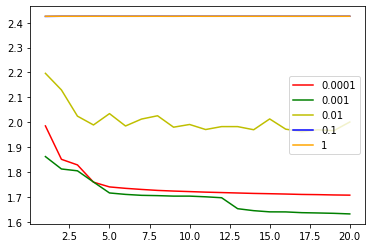

In [ ]:
color = ['r', 'g', 'y', 'b', 'orange']
labels = [0.0001, 0.001, 0.01, 0.1, 1]
for i in range(5):
  plt.plot(1+np.arange(20), totloss1[i], color = color[i], label = labels[i])
  plt.legend()
plt.show()

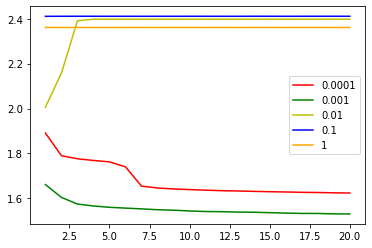

In [ ]:
for i in range(5):
  plt.plot(1+np.arange(20), totloss2[i], color = color[i], label = labels[i])
  plt.legend()
plt.show()

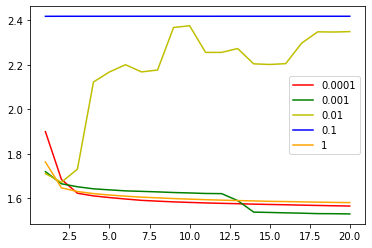

In [ ]:
for i in range(5):
  plt.plot(1+np.arange(20), totloss3[i], color = color[i], label = labels[i])
  plt.legend()
plt.show()

In [ ]:
lr = 0.01
bs = [16, 64, 256, 1024, 2048]
model_1 = list()
i=0
for batch_size in bs:
  t, m = train_model(FFN = FFN1, lr = lr, batch_size = batch_size, momentum=0.9, epochs=20)
  model_1.append(m)
  i = i+1



Epoch: 1


  0%|          | 0/3750 [00:00<?, ?it/s]

Loss: 2.3980118143717446 	Acc: 0.10001666666666667


Epoch: 2


  0%|          | 0/3750 [00:00<?, ?it/s]

Loss: 2.3979800224304197 	Acc: 0.1


Epoch: 3


  0%|          | 0/3750 [00:00<?, ?it/s]

Loss: 2.3979800224304197 	Acc: 0.1


Epoch: 4


  0%|          | 0/3750 [00:00<?, ?it/s]

Loss: 2.3979800224304197 	Acc: 0.1


Epoch: 5


  0%|          | 0/3750 [00:00<?, ?it/s]

Loss: 2.3979800224304197 	Acc: 0.1


Epoch: 6


  0%|          | 0/3750 [00:00<?, ?it/s]

Loss: 2.3979800224304197 	Acc: 0.1


Epoch: 7


  0%|          | 0/3750 [00:00<?, ?it/s]

Loss: 2.3979800224304197 	Acc: 0.1


Epoch: 8


  0%|          | 0/3750 [00:00<?, ?it/s]

Loss: 2.3979800224304197 	Acc: 0.1


Epoch: 9


  0%|          | 0/3750 [00:00<?, ?it/s]

Loss: 2.3979800224304197 	Acc: 0.1


Epoch: 10


  0%|          | 0/3750 [00:00<?, ?it/s]

Loss: 2.3979800224304197 	Acc: 0.1


Epoch: 11


  0%|          | 0/3750 [00:00<?, ?it/s]

Loss: 2.3979800224304197 	Acc: 0.1


Epoch: 12


  0%|          | 0/3750 [00:00<?, ?it/s]

Loss: 2.3979800224304197 	Acc: 0.1


Epoch: 13


  0%|          | 0/3750 [00:00<?, ?it/s]

Loss: 2.3979800224304197 	Acc: 0.1


Epoch: 14


  0%|          | 0/3750 [00:00<?, ?it/s]

Loss: 2.3979800224304197 	Acc: 0.1


Epoch: 15


  0%|          | 0/3750 [00:00<?, ?it/s]

Loss: 2.3979800224304197 	Acc: 0.1


Epoch: 16


  0%|          | 0/3750 [00:00<?, ?it/s]

Loss: 2.3979800224304197 	Acc: 0.1


Epoch: 17


  0%|          | 0/3750 [00:00<?, ?it/s]

Loss: 2.3979800224304197 	Acc: 0.1


Epoch: 18


  0%|          | 0/3750 [00:00<?, ?it/s]

Loss: 2.3979800224304197 	Acc: 0.1


Epoch: 19


  0%|          | 0/3750 [00:00<?, ?it/s]

Loss: 2.3979800224304197 	Acc: 0.1


Epoch: 20


  0%|          | 0/3750 [00:00<?, ?it/s]

Loss: 2.3979800224304197 	Acc: 0.1


Epoch: 1


  0%|          | 0/938 [00:00<?, ?it/s]

Loss: 2.1995630521001592 	Acc: 0.1957


Epoch: 2


  0%|          | 0/938 [00:00<?, ?it/s]

Loss: 2.1837653663875196 	Acc: 0.19663333333333333


Epoch: 3


  0%|          | 0/938 [00:00<?, ?it/s]

Loss: 2.149802158000881 	Acc: 0.19276666666666667


Epoch: 4


  0%|          | 0/938 [00:00<?, ?it/s]

Loss: 2.11535607306942 	Acc: 0.19665


Epoch: 5


  0%|          | 0/938 [00:00<?, ?it/s]

Loss: 2.1123128011028394 	Acc: 0.19641666666666666


Epoch: 6


  0%|          | 0/938 [00:00<?, ?it/s]

Loss: 2.1102676373809133 	Acc: 0.19505


Epoch: 7


  0%|          | 0/938 [00:00<?, ?it/s]

Loss: 2.1150612203297077 	Acc: 0.19593333333333332


Epoch: 8


  0%|          | 0/938 [00:00<?, ?it/s]

Loss: 2.1134284491986355 	Acc: 0.19686666666666666


Epoch: 9


  0%|          | 0/938 [00:00<?, ?it/s]

Loss: 2.1092591386105712 	Acc: 0.19858333333333333


Epoch: 10


  0%|          | 0/938 [00:00<?, ?it/s]

Loss: 2.1117937325922918 	Acc: 0.1966


Epoch: 11


  0%|          | 0/938 [00:00<?, ?it/s]

Loss: 2.113221497805134 	Acc: 0.19793333333333332


Epoch: 12


  0%|          | 0/938 [00:00<?, ?it/s]

Loss: 2.108328747723911 	Acc: 0.19833333333333333


Epoch: 13


  0%|          | 0/938 [00:00<?, ?it/s]

Loss: 2.1254697825862907 	Acc: 0.19393333333333335


Epoch: 14


  0%|          | 0/938 [00:00<?, ?it/s]

Loss: 2.1069561488338624 	Acc: 0.19793333333333332


Epoch: 15


  0%|          | 0/938 [00:00<?, ?it/s]

Loss: 2.109020983867808 	Acc: 0.198


Epoch: 16


  0%|          | 0/938 [00:00<?, ?it/s]

Loss: 2.1101465833975053 	Acc: 0.19811666666666666


Epoch: 17


  0%|          | 0/938 [00:00<?, ?it/s]

Loss: 2.110012026229647 	Acc: 0.19853333333333334


Epoch: 18


  0%|          | 0/938 [00:00<?, ?it/s]

Loss: 2.1094278361497403 	Acc: 0.19816666666666666


Epoch: 19


  0%|          | 0/938 [00:00<?, ?it/s]

Loss: 2.1066834232700407 	Acc: 0.199


Epoch: 20


  0%|          | 0/938 [00:00<?, ?it/s]

Loss: 2.1056751892256584 	Acc: 0.19878333333333334


Epoch: 1


  0%|          | 0/235 [00:00<?, ?it/s]

Loss: 1.882950539284564 	Acc: 0.28245


Epoch: 2


  0%|          | 0/235 [00:00<?, ?it/s]

Loss: 1.7483094017556373 	Acc: 0.47265


Epoch: 3


  0%|          | 0/235 [00:00<?, ?it/s]

Loss: 1.739343989149053 	Acc: 0.49966666666666665


Epoch: 4


  0%|          | 0/235 [00:00<?, ?it/s]

Loss: 1.7297133826194926 	Acc: 0.5001833333333333


Epoch: 5


  0%|          | 0/235 [00:00<?, ?it/s]

Loss: 1.6777039010474022 	Acc: 0.5233166666666667


Epoch: 6


  0%|          | 0/235 [00:00<?, ?it/s]

Loss: 1.6504522983064043 	Acc: 0.5421833333333334


Epoch: 7


  0%|          | 0/235 [00:00<?, ?it/s]

Loss: 1.6455755690310865 	Acc: 0.5478166666666666


Epoch: 8


  0%|          | 0/235 [00:00<?, ?it/s]

Loss: 1.6457098661585057 	Acc: 0.5489


Epoch: 9


  0%|          | 0/235 [00:00<?, ?it/s]

Loss: 1.6384883799451462 	Acc: 0.5653333333333334


Epoch: 10


  0%|          | 0/235 [00:00<?, ?it/s]

Loss: 1.6382311562274365 	Acc: 0.5970666666666666


Epoch: 11


  0%|          | 0/235 [00:00<?, ?it/s]

Loss: 1.6348000881519724 	Acc: 0.62


Epoch: 12


  0%|          | 0/235 [00:00<?, ?it/s]

Loss: 1.6302717295098812 	Acc: 0.64735


Epoch: 13


  0%|          | 0/235 [00:00<?, ?it/s]

Loss: 1.6205384421855846 	Acc: 0.7030333333333333


Epoch: 14


  0%|          | 0/235 [00:00<?, ?it/s]

Loss: 1.6158019456457584 	Acc: 0.7157833333333333


Epoch: 15


  0%|          | 0/235 [00:00<?, ?it/s]

Loss: 1.6182838789960172 	Acc: 0.71995


Epoch: 16


  0%|          | 0/235 [00:00<?, ?it/s]

Loss: 1.6146114085582977 	Acc: 0.7039


Epoch: 17


  0%|          | 0/235 [00:00<?, ?it/s]

Loss: 1.6086108968612995 	Acc: 0.71805


Epoch: 18


  0%|          | 0/235 [00:00<?, ?it/s]

Loss: 1.6095456772662224 	Acc: 0.7074833333333334


Epoch: 19


  0%|          | 0/235 [00:00<?, ?it/s]

Loss: 1.610996982899118 	Acc: 0.7123


Epoch: 20


  0%|          | 0/235 [00:00<?, ?it/s]

Loss: 1.611484281560208 	Acc: 0.7200666666666666


Epoch: 1


  0%|          | 0/59 [00:00<?, ?it/s]

Loss: 2.1022058907201733 	Acc: 0.11011666666666667


Epoch: 2


  0%|          | 0/59 [00:00<?, ?it/s]

Loss: 2.063132415383549 	Acc: 0.10323333333333333


Epoch: 3


  0%|          | 0/59 [00:00<?, ?it/s]

Loss: 2.0106825202198353 	Acc: 0.2135


Epoch: 4


  0%|          | 0/59 [00:00<?, ?it/s]

Loss: 1.9636629597615387 	Acc: 0.2967166666666667


Epoch: 5


  0%|          | 0/59 [00:00<?, ?it/s]

Loss: 1.9513314214803406 	Acc: 0.30278333333333335


Epoch: 6


  0%|          | 0/59 [00:00<?, ?it/s]

Loss: 1.8170446723194447 	Acc: 0.45155


Epoch: 7


  0%|          | 0/59 [00:00<?, ?it/s]

Loss: 1.7813038118815019 	Acc: 0.5403333333333333


Epoch: 8


  0%|          | 0/59 [00:00<?, ?it/s]

Loss: 1.76791806948387 	Acc: 0.57715


Epoch: 9


  0%|          | 0/59 [00:00<?, ?it/s]

Loss: 1.75680249424304 	Acc: 0.59775


Epoch: 10


  0%|          | 0/59 [00:00<?, ?it/s]

Loss: 1.6732572418148235 	Acc: 0.6570166666666667


Epoch: 11


  0%|          | 0/59 [00:00<?, ?it/s]

Loss: 1.6602059501712605 	Acc: 0.6745166666666667


Epoch: 12


  0%|          | 0/59 [00:00<?, ?it/s]

Loss: 1.6565740330744598 	Acc: 0.6847833333333333


Epoch: 13


  0%|          | 0/59 [00:00<?, ?it/s]

Loss: 1.6518271171440513 	Acc: 0.7020166666666666


Epoch: 14


  0%|          | 0/59 [00:00<?, ?it/s]

Loss: 1.6512080370369604 	Acc: 0.7022333333333334


Epoch: 15


  0%|          | 0/59 [00:00<?, ?it/s]

Loss: 1.647034731961913 	Acc: 0.7076333333333333


Epoch: 16


  0%|          | 0/59 [00:00<?, ?it/s]

Loss: 1.6438584954051647 	Acc: 0.7228


Epoch: 17


  0%|          | 0/59 [00:00<?, ?it/s]

Loss: 1.643743345292948 	Acc: 0.7138666666666666


Epoch: 18


  0%|          | 0/59 [00:00<?, ?it/s]

Loss: 1.6397126084667142 	Acc: 0.7210666666666666


Epoch: 19


  0%|          | 0/59 [00:00<?, ?it/s]

Loss: 1.6395174345727694 	Acc: 0.721


Epoch: 20


  0%|          | 0/59 [00:00<?, ?it/s]

Loss: 1.6352537951226962 	Acc: 0.7339833333333333


Epoch: 1


  0%|          | 0/30 [00:00<?, ?it/s]

Loss: 2.000119105974833 	Acc: 0.19716666666666666


Epoch: 2


  0%|          | 0/30 [00:00<?, ?it/s]

Loss: 1.9153265396753947 	Acc: 0.34815


Epoch: 3


  0%|          | 0/30 [00:00<?, ?it/s]

Loss: 1.907835312684377 	Acc: 0.3564833333333333


Epoch: 4


  0%|          | 0/30 [00:00<?, ?it/s]

Loss: 1.9033010244369506 	Acc: 0.3626666666666667


Epoch: 5


  0%|          | 0/30 [00:00<?, ?it/s]

Loss: 1.8995699604352316 	Acc: 0.36261666666666664


Epoch: 6


  0%|          | 0/30 [00:00<?, ?it/s]

Loss: 1.8961361249287922 	Acc: 0.364


Epoch: 7


  0%|          | 0/30 [00:00<?, ?it/s]

Loss: 1.8969085137049357 	Acc: 0.3678


Epoch: 8


  0%|          | 0/30 [00:00<?, ?it/s]

Loss: 1.8944084604581197 	Acc: 0.36578333333333335


Epoch: 9


  0%|          | 0/30 [00:00<?, ?it/s]

Loss: 1.8899350722630819 	Acc: 0.3688666666666667


Epoch: 10


  0%|          | 0/30 [00:00<?, ?it/s]

Loss: 1.8889741857846578 	Acc: 0.36806666666666665


Epoch: 11


  0%|          | 0/30 [00:00<?, ?it/s]

Loss: 1.8883726994196575 	Acc: 0.37211666666666665


Epoch: 12


  0%|          | 0/30 [00:00<?, ?it/s]

Loss: 1.8841968576113384 	Acc: 0.37161666666666665


Epoch: 13


  0%|          | 0/30 [00:00<?, ?it/s]

Loss: 1.8757998148600261 	Acc: 0.3707


Epoch: 14


  0%|          | 0/30 [00:00<?, ?it/s]

Loss: 1.8720343351364135 	Acc: 0.3720333333333333


Epoch: 15


  0%|          | 0/30 [00:00<?, ?it/s]

Loss: 1.8696807980537415 	Acc: 0.3782


Epoch: 16


  0%|          | 0/30 [00:00<?, ?it/s]

Loss: 1.8686411420504252 	Acc: 0.37675


Epoch: 17


  0%|          | 0/30 [00:00<?, ?it/s]

Loss: 1.8672863284746806 	Acc: 0.3793


Epoch: 18


  0%|          | 0/30 [00:00<?, ?it/s]

Loss: 1.865098226070404 	Acc: 0.3823166666666667


Epoch: 19


  0%|          | 0/30 [00:00<?, ?it/s]

Loss: 1.8160170793533326 	Acc: 0.4397


Epoch: 20


  0%|          | 0/30 [00:00<?, ?it/s]

Loss: 1.716764795780182 	Acc: 0.5442833333333333


In [ ]:
lr = 0.01
bs = [16, 64, 256, 1024, 2048]
model_2 = list()
i=0
for batch_size in bs:
  t, m = train_model(FFN = FFN2, lr = lr, batch_size = batch_size, momentum=0.9, epochs=20)
  model_2.append(m)
  i = i+1



Epoch: 1


  0%|          | 0/3750 [00:00<?, ?it/s]

Loss: 2.4182553679148358 	Acc: 0.09995


Epoch: 2


  0%|          | 0/3750 [00:00<?, ?it/s]

Loss: 2.4183203895568846 	Acc: 0.1


Epoch: 3


  0%|          | 0/3750 [00:00<?, ?it/s]

Loss: 2.4183203892389935 	Acc: 0.1


Epoch: 4


  0%|          | 0/3750 [00:00<?, ?it/s]

Loss: 2.4183203886349998 	Acc: 0.1


Epoch: 5


  0%|          | 0/3750 [00:00<?, ?it/s]

Loss: 2.418320387808482 	Acc: 0.1


Epoch: 6


  0%|          | 0/3750 [00:00<?, ?it/s]

Loss: 2.4183203899065653 	Acc: 0.1


Epoch: 7


  0%|          | 0/3750 [00:00<?, ?it/s]

Loss: 2.4183203887939455 	Acc: 0.1


Epoch: 8


  0%|          | 0/3750 [00:00<?, ?it/s]

Loss: 2.418320390256246 	Acc: 0.1


Epoch: 9


  0%|          | 0/3750 [00:00<?, ?it/s]

Loss: 2.4183203897794088 	Acc: 0.1


Epoch: 10


  0%|          | 0/3750 [00:00<?, ?it/s]

Loss: 2.418320389429728 	Acc: 0.1


Epoch: 11


  0%|          | 0/3750 [00:00<?, ?it/s]

Loss: 2.4183203892072043 	Acc: 0.1


Epoch: 12


  0%|          | 0/3750 [00:00<?, ?it/s]

Loss: 2.4183203891118366 	Acc: 0.1


Epoch: 13


  0%|          | 0/3750 [00:00<?, ?it/s]

Loss: 2.4183203899383545 	Acc: 0.1


Epoch: 14


  0%|          | 0/3750 [00:00<?, ?it/s]

Loss: 2.4183203908284505 	Acc: 0.1


Epoch: 15


  0%|          | 0/3750 [00:00<?, ?it/s]

Loss: 2.418320390065511 	Acc: 0.1


Epoch: 16


  0%|          | 0/3750 [00:00<?, ?it/s]

Loss: 2.4183203893979393 	Acc: 0.1


Epoch: 17


  0%|          | 0/3750 [00:00<?, ?it/s]

Loss: 2.4183203883171083 	Acc: 0.1


Epoch: 18


  0%|          | 0/3750 [00:00<?, ?it/s]

Loss: 2.4183203886667886 	Acc: 0.1


Epoch: 19


  0%|          | 0/3750 [00:00<?, ?it/s]

Loss: 2.418320387903849 	Acc: 0.1


Epoch: 20


  0%|          | 0/3750 [00:00<?, ?it/s]

Loss: 2.4183203893343608 	Acc: 0.1


Epoch: 1


  0%|          | 0/938 [00:00<?, ?it/s]

Loss: 1.7761251744685143 	Acc: 0.39286666666666664


Epoch: 2


  0%|          | 0/938 [00:00<?, ?it/s]

Loss: 1.7764148703261988 	Acc: 0.40613333333333335


Epoch: 3


  0%|          | 0/938 [00:00<?, ?it/s]

Loss: 1.8579753802529275 	Acc: 0.3222333333333333


Epoch: 4


  0%|          | 0/938 [00:00<?, ?it/s]

Loss: 1.8954099791644732 	Acc: 0.3283333333333333


Epoch: 5


  0%|          | 0/938 [00:00<?, ?it/s]

Loss: 1.862450966575761 	Acc: 0.3149166666666667


Epoch: 6


  0%|          | 0/938 [00:00<?, ?it/s]

Loss: 2.264521548107489 	Acc: 0.1684


Epoch: 7


  0%|          | 0/938 [00:00<?, ?it/s]

Loss: 2.425649064181964 	Acc: 0.1


Epoch: 8


  0%|          | 0/938 [00:00<?, ?it/s]

Loss: 2.4257855184042634 	Acc: 0.1


Epoch: 9


  0%|          | 0/938 [00:00<?, ?it/s]

Loss: 2.4256689136724736 	Acc: 0.1


Epoch: 10


  0%|          | 0/938 [00:00<?, ?it/s]

Loss: 2.4256522563983127 	Acc: 0.1


Epoch: 11


  0%|          | 0/938 [00:00<?, ?it/s]

Loss: 2.4256855714549896 	Acc: 0.1


Epoch: 12


  0%|          | 0/938 [00:00<?, ?it/s]

Loss: 2.4256355986157967 	Acc: 0.1


Epoch: 13


  0%|          | 0/938 [00:00<?, ?it/s]

Loss: 2.425568966977378 	Acc: 0.1


Epoch: 14


  0%|          | 0/938 [00:00<?, ?it/s]

Loss: 2.425735545819248 	Acc: 0.1


Epoch: 15


  0%|          | 0/938 [00:00<?, ?it/s]

Loss: 2.4256356001408625 	Acc: 0.1


Epoch: 16


  0%|          | 0/938 [00:00<?, ?it/s]

Loss: 2.4257355455650704 	Acc: 0.1


Epoch: 17


  0%|          | 0/938 [00:00<?, ?it/s]

Loss: 2.4257355455650704 	Acc: 0.1


Epoch: 18


  0%|          | 0/938 [00:00<?, ?it/s]

Loss: 2.42573554454836 	Acc: 0.1


Epoch: 19


  0%|          | 0/938 [00:00<?, ?it/s]

Loss: 2.4257022292375057 	Acc: 0.1


Epoch: 20


  0%|          | 0/938 [00:00<?, ?it/s]

Loss: 2.425668914689184 	Acc: 0.1


Epoch: 1


  0%|          | 0/235 [00:00<?, ?it/s]

Loss: 1.8387210648110572 	Acc: 0.20285


Epoch: 2


  0%|          | 0/235 [00:00<?, ?it/s]

Loss: 1.739278494043553 	Acc: 0.29773333333333335


Epoch: 3


  0%|          | 0/235 [00:00<?, ?it/s]

Loss: 1.6560285826946826 	Acc: 0.53045


Epoch: 4


  0%|          | 0/235 [00:00<?, ?it/s]

Loss: 1.6342233130272399 	Acc: 0.5697333333333333


Epoch: 5


  0%|          | 0/235 [00:00<?, ?it/s]

Loss: 1.6323026342594877 	Acc: 0.5733833333333334


Epoch: 6


  0%|          | 0/235 [00:00<?, ?it/s]

Loss: 1.6265019685664075 	Acc: 0.5843166666666667


Epoch: 7


  0%|          | 0/235 [00:00<?, ?it/s]

Loss: 1.6232969502185253 	Acc: 0.5817166666666667


Epoch: 8


  0%|          | 0/235 [00:00<?, ?it/s]

Loss: 1.6153265171862663 	Acc: 0.6481166666666667


Epoch: 9


  0%|          | 0/235 [00:00<?, ?it/s]

Loss: 1.5961543382482326 	Acc: 0.7546666666666667


Epoch: 10


  0%|          | 0/235 [00:00<?, ?it/s]

Loss: 1.5886291676379265 	Acc: 0.7677


Epoch: 11


  0%|          | 0/235 [00:00<?, ?it/s]

Loss: 1.5787886781895415 	Acc: 0.7749333333333334


Epoch: 12


  0%|          | 0/235 [00:00<?, ?it/s]

Loss: 1.5734363352998775 	Acc: 0.7892333333333333


Epoch: 13


  0%|          | 0/235 [00:00<?, ?it/s]

Loss: 1.5715940439954716 	Acc: 0.78775


Epoch: 14


  0%|          | 0/235 [00:00<?, ?it/s]

Loss: 1.5718140546311723 	Acc: 0.7854166666666667


Epoch: 15


  0%|          | 0/235 [00:00<?, ?it/s]

Loss: 1.569746230510955 	Acc: 0.8039333333333334


Epoch: 16


  0%|          | 0/235 [00:00<?, ?it/s]

Loss: 1.5665131355853792 	Acc: 0.7929833333333334


Epoch: 17


  0%|          | 0/235 [00:00<?, ?it/s]

Loss: 1.5675387179597895 	Acc: 0.80115


Epoch: 18


  0%|          | 0/235 [00:00<?, ?it/s]

Loss: 1.5665307212383188 	Acc: 0.7903666666666667


Epoch: 19


  0%|          | 0/235 [00:00<?, ?it/s]

Loss: 1.5664774174385883 	Acc: 0.78635


Epoch: 20


  0%|          | 0/235 [00:00<?, ?it/s]

Loss: 1.5635671133690692 	Acc: 0.80035


Epoch: 1


  0%|          | 0/59 [00:00<?, ?it/s]

Loss: 1.922903224573297 	Acc: 0.36365


Epoch: 2


  0%|          | 0/59 [00:00<?, ?it/s]

Loss: 1.7309787758326127 	Acc: 0.5514166666666667


Epoch: 3


  0%|          | 0/59 [00:00<?, ?it/s]

Loss: 1.7077746229656672 	Acc: 0.5968333333333333


Epoch: 4


  0%|          | 0/59 [00:00<?, ?it/s]

Loss: 1.6921800859903886 	Acc: 0.6207


Epoch: 5


  0%|          | 0/59 [00:00<?, ?it/s]

Loss: 1.6683477729053822 	Acc: 0.7331833333333333


Epoch: 6


  0%|          | 0/59 [00:00<?, ?it/s]

Loss: 1.641623159586373 	Acc: 0.7629333333333334


Epoch: 7


  0%|          | 0/59 [00:00<?, ?it/s]

Loss: 1.6329900450625663 	Acc: 0.7691333333333333


Epoch: 8


  0%|          | 0/59 [00:00<?, ?it/s]

Loss: 1.6281976720034066 	Acc: 0.7752


Epoch: 9


  0%|          | 0/59 [00:00<?, ?it/s]

Loss: 1.627276943901838 	Acc: 0.7830833333333334


Epoch: 10


  0%|          | 0/59 [00:00<?, ?it/s]

Loss: 1.627344870971421 	Acc: 0.7885


Epoch: 11


  0%|          | 0/59 [00:00<?, ?it/s]

Loss: 1.6221379910485219 	Acc: 0.7975166666666667


Epoch: 12


  0%|          | 0/59 [00:00<?, ?it/s]

Loss: 1.6184813653008412 	Acc: 0.8022666666666667


Epoch: 13


  0%|          | 0/59 [00:00<?, ?it/s]

Loss: 1.6168423002049075 	Acc: 0.8037833333333333


Epoch: 14


  0%|          | 0/59 [00:00<?, ?it/s]

Loss: 1.6144828149827861 	Acc: 0.8071666666666667


Epoch: 15


  0%|          | 0/59 [00:00<?, ?it/s]

Loss: 1.6144560838149766 	Acc: 0.806


Epoch: 16


  0%|          | 0/59 [00:00<?, ?it/s]

Loss: 1.612745216337301 	Acc: 0.8080166666666667


Epoch: 17


  0%|          | 0/59 [00:00<?, ?it/s]

Loss: 1.6109704547009225 	Acc: 0.8093833333333333


Epoch: 18


  0%|          | 0/59 [00:00<?, ?it/s]

Loss: 1.6121399079338978 	Acc: 0.8093833333333333


Epoch: 19


  0%|          | 0/59 [00:00<?, ?it/s]

Loss: 1.6078026739217468 	Acc: 0.8144833333333333


Epoch: 20


  0%|          | 0/59 [00:00<?, ?it/s]

Loss: 1.6075074349419545 	Acc: 0.8146666666666667


Epoch: 1


  0%|          | 0/30 [00:00<?, ?it/s]

Loss: 1.912739598751068 	Acc: 0.4587833333333333


Epoch: 2


  0%|          | 0/30 [00:00<?, ?it/s]

Loss: 1.7193394263585409 	Acc: 0.64045


Epoch: 3


  0%|          | 0/30 [00:00<?, ?it/s]

Loss: 1.698332126935323 	Acc: 0.6614666666666666


Epoch: 4


  0%|          | 0/30 [00:00<?, ?it/s]

Loss: 1.6893076062202455 	Acc: 0.6711


Epoch: 5


  0%|          | 0/30 [00:00<?, ?it/s]

Loss: 1.68186350663503 	Acc: 0.6777


Epoch: 6


  0%|          | 0/30 [00:00<?, ?it/s]

Loss: 1.6741016030311584 	Acc: 0.70375


Epoch: 7


  0%|          | 0/30 [00:00<?, ?it/s]

Loss: 1.6663676222165427 	Acc: 0.7201166666666666


Epoch: 8


  0%|          | 0/30 [00:00<?, ?it/s]

Loss: 1.6517115632692974 	Acc: 0.7248


Epoch: 9


  0%|          | 0/30 [00:00<?, ?it/s]

Loss: 1.6450047254562379 	Acc: 0.7380166666666667


Epoch: 10


  0%|          | 0/30 [00:00<?, ?it/s]

Loss: 1.6427479187647502 	Acc: 0.7422166666666666


Epoch: 11


  0%|          | 0/30 [00:00<?, ?it/s]

Loss: 1.6401191035906473 	Acc: 0.7475833333333334


Epoch: 12


  0%|          | 0/30 [00:00<?, ?it/s]

Loss: 1.6389642000198363 	Acc: 0.7491


Epoch: 13


  0%|          | 0/30 [00:00<?, ?it/s]

Loss: 1.636705513795217 	Acc: 0.7552


Epoch: 14


  0%|          | 0/30 [00:00<?, ?it/s]

Loss: 1.6335962971051534 	Acc: 0.75775


Epoch: 15


  0%|          | 0/30 [00:00<?, ?it/s]

Loss: 1.6356043656667074 	Acc: 0.7583833333333333


Epoch: 16


  0%|          | 0/30 [00:00<?, ?it/s]

Loss: 1.6315558910369874 	Acc: 0.7710166666666667


Epoch: 17


  0%|          | 0/30 [00:00<?, ?it/s]

Loss: 1.6284717559814452 	Acc: 0.7729833333333334


Epoch: 18


  0%|          | 0/30 [00:00<?, ?it/s]

Loss: 1.6258331497510274 	Acc: 0.7757833333333334


Epoch: 19


  0%|          | 0/30 [00:00<?, ?it/s]

Loss: 1.6258006811141967 	Acc: 0.7845


Epoch: 20


  0%|          | 0/30 [00:00<?, ?it/s]

Loss: 1.6235225876172383 	Acc: 0.789


In [ ]:
lr = 0.01
bs = [16, 64, 256, 1024, 2048]
model_3 = list()
i=0
for batch_size in bs:
  t, m = train_model(FFN = FFN3, lr = lr, batch_size = batch_size, momentum=0.9, epochs=20)
  model_3.append(m)
  i = i+1



Epoch: 1


  0%|          | 0/3750 [00:00<?, ?it/s]

Loss: 2.4253130000114442 	Acc: 0.10021666666666666


Epoch: 2


  0%|          | 0/3750 [00:00<?, ?it/s]

Loss: 2.425721981048584 	Acc: 0.1


Epoch: 3


  0%|          | 0/3750 [00:00<?, ?it/s]

Loss: 2.4257219811121624 	Acc: 0.1


Epoch: 4


  0%|          | 0/3750 [00:00<?, ?it/s]

Loss: 2.425721981048584 	Acc: 0.1


Epoch: 5


  0%|          | 0/3750 [00:00<?, ?it/s]

Loss: 2.4257219811121624 	Acc: 0.1


Epoch: 6


  0%|          | 0/3750 [00:00<?, ?it/s]

Loss: 2.4257219810167947 	Acc: 0.1


Epoch: 7


  0%|          | 0/3750 [00:00<?, ?it/s]

Loss: 2.425721980985006 	Acc: 0.1


Epoch: 8


  0%|          | 0/3750 [00:00<?, ?it/s]

Loss: 2.425721980889638 	Acc: 0.1


Epoch: 9


  0%|          | 0/3750 [00:00<?, ?it/s]

Loss: 2.4257219809532167 	Acc: 0.1


Epoch: 10


  0%|          | 0/3750 [00:00<?, ?it/s]

Loss: 2.425721980985006 	Acc: 0.1


Epoch: 11


  0%|          | 0/3750 [00:00<?, ?it/s]

Loss: 2.425721981048584 	Acc: 0.1


Epoch: 12


  0%|          | 0/3750 [00:00<?, ?it/s]

Loss: 2.425721980794271 	Acc: 0.1


Epoch: 13


  0%|          | 0/3750 [00:00<?, ?it/s]

Loss: 2.425721980794271 	Acc: 0.1


Epoch: 14


  0%|          | 0/3750 [00:00<?, ?it/s]

Loss: 2.425721980794271 	Acc: 0.1


Epoch: 15


  0%|          | 0/3750 [00:00<?, ?it/s]

Loss: 2.425721980857849 	Acc: 0.1


Epoch: 16


  0%|          | 0/3750 [00:00<?, ?it/s]

Loss: 2.4257219807624817 	Acc: 0.1


Epoch: 17


  0%|          | 0/3750 [00:00<?, ?it/s]

Loss: 2.425721980857849 	Acc: 0.1


Epoch: 18


  0%|          | 0/3750 [00:00<?, ?it/s]

Loss: 2.425721980794271 	Acc: 0.1


Epoch: 19


  0%|          | 0/3750 [00:00<?, ?it/s]

Loss: 2.4257219807624817 	Acc: 0.1


Epoch: 20


  0%|          | 0/3750 [00:00<?, ?it/s]

Loss: 2.425721980857849 	Acc: 0.1


Epoch: 1


  0%|          | 0/938 [00:00<?, ?it/s]

Loss: 1.705893482099464 	Acc: 0.4907166666666667


Epoch: 2


  0%|          | 0/938 [00:00<?, ?it/s]

Loss: 1.737925394765858 	Acc: 0.4474666666666667


Epoch: 3


  0%|          | 0/938 [00:00<?, ?it/s]

Loss: 1.8142425433150742 	Acc: 0.3597666666666667


Epoch: 4


  0%|          | 0/938 [00:00<?, ?it/s]

Loss: 1.984398440003141 	Acc: 0.27531666666666665


Epoch: 5


  0%|          | 0/938 [00:00<?, ?it/s]

Loss: 2.3238958613450595 	Acc: 0.13625


Epoch: 6


  0%|          | 0/938 [00:00<?, ?it/s]

Loss: 2.1880862913660404 	Acc: 0.17168333333333333


Epoch: 7


  0%|          | 0/938 [00:00<?, ?it/s]

Loss: 2.1414944749397002 	Acc: 0.19666666666666666


Epoch: 8


  0%|          | 0/938 [00:00<?, ?it/s]

Loss: 2.1416609303783507 	Acc: 0.1968


Epoch: 9


  0%|          | 0/938 [00:00<?, ?it/s]

Loss: 2.1626498846611235 	Acc: 0.19321666666666668


Epoch: 10


  0%|          | 0/938 [00:00<?, ?it/s]

Loss: 2.2439228540290395 	Acc: 0.15701666666666667


Epoch: 11


  0%|          | 0/938 [00:00<?, ?it/s]

Loss: 2.1313834472505775 	Acc: 0.19825


Epoch: 12


  0%|          | 0/938 [00:00<?, ?it/s]

Loss: 2.1732726933351203 	Acc: 0.18293333333333334


Epoch: 13


  0%|          | 0/938 [00:00<?, ?it/s]

Loss: 2.4182338473130898 	Acc: 0.1


Epoch: 14


  0%|          | 0/938 [00:00<?, ?it/s]

Loss: 2.4183504558575435 	Acc: 0.1


Epoch: 15


  0%|          | 0/938 [00:00<?, ?it/s]

Loss: 2.4183837671015564 	Acc: 0.1


Epoch: 16


  0%|          | 0/938 [00:00<?, ?it/s]

Loss: 2.4182838183730397 	Acc: 0.1


Epoch: 17


  0%|          | 0/938 [00:00<?, ?it/s]

Loss: 2.418367113894237 	Acc: 0.1


Epoch: 18


  0%|          | 0/938 [00:00<?, ?it/s]

Loss: 2.4182671608447013 	Acc: 0.1


Epoch: 19


  0%|          | 0/938 [00:00<?, ?it/s]

Loss: 2.4183671077939746 	Acc: 0.1


Epoch: 20


  0%|          | 0/938 [00:00<?, ?it/s]

Loss: 2.418367109573218 	Acc: 0.1


Epoch: 1


  0%|          | 0/235 [00:00<?, ?it/s]

Loss: 1.6653374900209144 	Acc: 0.6401833333333333


Epoch: 2


  0%|          | 0/235 [00:00<?, ?it/s]

Loss: 1.604049368614846 	Acc: 0.7470833333333333


Epoch: 3


  0%|          | 0/235 [00:00<?, ?it/s]

Loss: 1.5815147947757802 	Acc: 0.8167666666666666


Epoch: 4


  0%|          | 0/235 [00:00<?, ?it/s]

Loss: 1.5677865723346143 	Acc: 0.83465


Epoch: 5


  0%|          | 0/235 [00:00<?, ?it/s]

Loss: 1.5623130636012301 	Acc: 0.83975


Epoch: 6


  0%|          | 0/235 [00:00<?, ?it/s]

Loss: 1.5576833131465506 	Acc: 0.84725


Epoch: 7


  0%|          | 0/235 [00:00<?, ?it/s]

Loss: 1.5554290888157296 	Acc: 0.8488


Epoch: 8


  0%|          | 0/235 [00:00<?, ?it/s]

Loss: 1.5527909568015565 	Acc: 0.8513166666666667


Epoch: 9


  0%|          | 0/235 [00:00<?, ?it/s]

Loss: 1.5498742027485624 	Acc: 0.8579833333333333


Epoch: 10


  0%|          | 0/235 [00:00<?, ?it/s]

Loss: 1.5473994006501868 	Acc: 0.8606166666666667


Epoch: 11


  0%|          | 0/235 [00:00<?, ?it/s]

Loss: 1.543202406802076 	Acc: 0.8669


Epoch: 12


  0%|          | 0/235 [00:00<?, ?it/s]

Loss: 1.5428792060689722 	Acc: 0.8673833333333333


Epoch: 13


  0%|          | 0/235 [00:00<?, ?it/s]

Loss: 1.5424189283492717 	Acc: 0.8677333333333334


Epoch: 14


  0%|          | 0/235 [00:00<?, ?it/s]

Loss: 1.5380183874292577 	Acc: 0.87525


Epoch: 15


  0%|          | 0/235 [00:00<?, ?it/s]

Loss: 1.5407319708073393 	Acc: 0.8693666666666666


Epoch: 16


  0%|          | 0/235 [00:00<?, ?it/s]

Loss: 1.5376733592216005 	Acc: 0.8745833333333334


Epoch: 17


  0%|          | 0/235 [00:00<?, ?it/s]

Loss: 1.536287906829347 	Acc: 0.8753166666666666


Epoch: 18


  0%|          | 0/235 [00:00<?, ?it/s]

Loss: 1.5365902210803741 	Acc: 0.8754666666666666


Epoch: 19


  0%|          | 0/235 [00:00<?, ?it/s]

Loss: 1.5348569398230694 	Acc: 0.8765666666666667


Epoch: 20


  0%|          | 0/235 [00:00<?, ?it/s]

Loss: 1.5343262403569322 	Acc: 0.8786166666666667


Epoch: 1


  0%|          | 0/59 [00:00<?, ?it/s]

Loss: 1.8780489735684152 	Acc: 0.26198333333333335


Epoch: 2


  0%|          | 0/59 [00:00<?, ?it/s]

Loss: 1.7306292279291962 	Acc: 0.49151666666666666


Epoch: 3


  0%|          | 0/59 [00:00<?, ?it/s]

Loss: 1.6822220006231534 	Acc: 0.5352


Epoch: 4


  0%|          | 0/59 [00:00<?, ?it/s]

Loss: 1.6244869454432342 	Acc: 0.6055333333333334


Epoch: 5


  0%|          | 0/59 [00:00<?, ?it/s]

Loss: 1.5978835922176555 	Acc: 0.6478


Epoch: 6


  0%|          | 0/59 [00:00<?, ?it/s]

Loss: 1.5868767681768385 	Acc: 0.6680166666666667


Epoch: 7


  0%|          | 0/59 [00:00<?, ?it/s]

Loss: 1.5826817528676178 	Acc: 0.6746333333333333


Epoch: 8


  0%|          | 0/59 [00:00<?, ?it/s]

Loss: 1.5812957246424788 	Acc: 0.6841166666666667


Epoch: 9


  0%|          | 0/59 [00:00<?, ?it/s]

Loss: 1.5779975996179096 	Acc: 0.68925


Epoch: 10


  0%|          | 0/59 [00:00<?, ?it/s]

Loss: 1.5760314282724412 	Acc: 0.7061333333333333


Epoch: 11


  0%|          | 0/59 [00:00<?, ?it/s]

Loss: 1.5750188706284862 	Acc: 0.7051


Epoch: 12


  0%|          | 0/59 [00:00<?, ?it/s]

Loss: 1.5712849447282695 	Acc: 0.7298333333333333


Epoch: 13


  0%|          | 0/59 [00:00<?, ?it/s]

Loss: 1.5606030306573642 	Acc: 0.8153


Epoch: 14


  0%|          | 0/59 [00:00<?, ?it/s]

Loss: 1.5464321253663402 	Acc: 0.8635833333333334


Epoch: 15


  0%|          | 0/59 [00:00<?, ?it/s]

Loss: 1.543191218780259 	Acc: 0.8662666666666666


Epoch: 16


  0%|          | 0/59 [00:00<?, ?it/s]

Loss: 1.5416109056796057 	Acc: 0.8690166666666667


Epoch: 17


  0%|          | 0/59 [00:00<?, ?it/s]

Loss: 1.5409318329924244 	Acc: 0.8695333333333334


Epoch: 18


  0%|          | 0/59 [00:00<?, ?it/s]

Loss: 1.538864133721691 	Acc: 0.8709166666666667


Epoch: 19


  0%|          | 0/59 [00:00<?, ?it/s]

Loss: 1.5370710926540827 	Acc: 0.8724333333333333


Epoch: 20


  0%|          | 0/59 [00:00<?, ?it/s]

Loss: 1.5370354248305498 	Acc: 0.8738833333333333


Epoch: 1


  0%|          | 0/30 [00:00<?, ?it/s]

Loss: 1.8270222981770834 	Acc: 0.46623333333333333


Epoch: 2


  0%|          | 0/30 [00:00<?, ?it/s]

Loss: 1.6580195983250936 	Acc: 0.5594


Epoch: 3


  0%|          | 0/30 [00:00<?, ?it/s]

Loss: 1.6239421407381693 	Acc: 0.7023333333333334


Epoch: 4


  0%|          | 0/30 [00:00<?, ?it/s]

Loss: 1.5992626388867697 	Acc: 0.7583333333333333


Epoch: 5


  0%|          | 0/30 [00:00<?, ?it/s]

Loss: 1.5934464097023011 	Acc: 0.7700333333333333


Epoch: 6


  0%|          | 0/30 [00:00<?, ?it/s]

Loss: 1.5872496565183003 	Acc: 0.78055


Epoch: 7


  0%|          | 0/30 [00:00<?, ?it/s]

Loss: 1.582404406865438 	Acc: 0.78695


Epoch: 8


  0%|          | 0/30 [00:00<?, ?it/s]

Loss: 1.577380108833313 	Acc: 0.7986


Epoch: 9


  0%|          | 0/30 [00:00<?, ?it/s]

Loss: 1.5726893345514934 	Acc: 0.8152333333333334


Epoch: 10


  0%|          | 0/30 [00:00<?, ?it/s]

Loss: 1.5666882117589316 	Acc: 0.8322166666666667


Epoch: 11


  0%|          | 0/30 [00:00<?, ?it/s]

Loss: 1.562397015094757 	Acc: 0.8408833333333333


Epoch: 12


  0%|          | 0/30 [00:00<?, ?it/s]

Loss: 1.5587424834569295 	Acc: 0.8470833333333333


Epoch: 13


  0%|          | 0/30 [00:00<?, ?it/s]

Loss: 1.556081442038218 	Acc: 0.8497333333333333


Epoch: 14


  0%|          | 0/30 [00:00<?, ?it/s]

Loss: 1.553935960928599 	Acc: 0.85215


Epoch: 15


  0%|          | 0/30 [00:00<?, ?it/s]

Loss: 1.554486831029256 	Acc: 0.8520166666666666


Epoch: 16


  0%|          | 0/30 [00:00<?, ?it/s]

Loss: 1.5505051533381145 	Acc: 0.8567166666666667


Epoch: 17


  0%|          | 0/30 [00:00<?, ?it/s]

Loss: 1.552807903289795 	Acc: 0.8558


Epoch: 18


  0%|          | 0/30 [00:00<?, ?it/s]

Loss: 1.5478471835454306 	Acc: 0.8601333333333333


Epoch: 19


  0%|          | 0/30 [00:00<?, ?it/s]

Loss: 1.546337612469991 	Acc: 0.86195


Epoch: 20


  0%|          | 0/30 [00:00<?, ?it/s]

Loss: 1.5448016087214151 	Acc: 0.8631166666666666


In [ ]:
def accuracy(model, batch_size):
      val_loader = torch.utils.data.DataLoader(val_data, batch_size=batch_size, shuffle=True, num_workers=0, pin_memory=False)
      model.eval()
      total_correct = 0
      total_instances = 0
      for images, labels in tqdm(val_loader):
        images, labels = images.to(device), labels.to(device)
        predictions = torch.argmax(model(images.float()), dim=1)
        correct_predictions = sum(predictions==labels).item()
        total_correct+=correct_predictions
        total_instances+=len(images)
      return round(total_correct/total_instances, 3)

In [ ]:
val_ac = {}
val_ac["Model1"], val_ac["Model2"], val_ac["Model3"] = list(), list(), list()
for i in range(5):
  val_ac["Model1"].append(accuracy(model_1[i], bs[i]))
  val_ac["Model2"].append(accuracy(model_2[i], bs[i]))
  val_ac["Model3"].append(accuracy(model_3[i], bs[i]))

  0%|          | 0/625 [00:00<?, ?it/s]

  0%|          | 0/625 [00:00<?, ?it/s]

  0%|          | 0/625 [00:00<?, ?it/s]

  0%|          | 0/157 [00:00<?, ?it/s]

  0%|          | 0/157 [00:00<?, ?it/s]

  0%|          | 0/157 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

In [ ]:
import pandas as pd
val_ac = pd.DataFrame.from_dict(val_ac)
val_ac = val_ac.T

In [ ]:
val_ac.rename(columns = { 0: 'Batch size1', 1 : 'Batch size2', 2: 'Batch size3', 3: 'Batch size4', 4 : 'Batch size5'}, inplace = True)

In [ ]:
val_ac

Batch size1  Batch size2  Batch size3  Batch size4  Batch size5
Model1          0.1        0.198        0.725        0.739        0.546
Model2          0.1        0.100        0.807        0.801        0.794
Model3          0.1        0.100        0.857        0.858        0.845

In [ ]:
class FFN4(torch.nn.Module):
  def __init__(self):
    super().__init__()
    self.layer1 = torch.nn.Linear(784, 512)
    self.layer2 = torch.nn.Linear(512, 10)

  def forward(self, x):
    x = x.view(x.shape[0], -1)
    x = torch.nn.ReLU()(self.layer1(x))
    x = torch.nn.Sigmoid()(self.layer2(x))
    return x

In [ ]:
loss, model = train_model(FFN = FFN4, lr = 0.01, batch_size = 64, momentum=0.9, epochs=20)



Epoch: 1


  0%|          | 0/938 [00:00<?, ?it/s]

Loss: 2.1752986075527376 	Acc: 0.23815


Epoch: 2


  0%|          | 0/938 [00:00<?, ?it/s]

Loss: 2.133850680485463 	Acc: 0.25606666666666666


Epoch: 3


  0%|          | 0/938 [00:00<?, ?it/s]

Loss: 2.1430570320534046 	Acc: 0.2750666666666667


Epoch: 4


  0%|          | 0/938 [00:00<?, ?it/s]

Loss: 2.1181995215446454 	Acc: 0.27936666666666665


Epoch: 5


  0%|          | 0/938 [00:00<?, ?it/s]

Loss: 2.127980101845666 	Acc: 0.2681


Epoch: 6


  0%|          | 0/938 [00:00<?, ?it/s]

Loss: 2.1400728144371177 	Acc: 0.23346666666666666


Epoch: 7


  0%|          | 0/938 [00:00<?, ?it/s]

Loss: 2.1379807956183137 	Acc: 0.24356666666666665


Epoch: 8


  0%|          | 0/938 [00:00<?, ?it/s]

Loss: 2.140101842788745 	Acc: 0.2324


Epoch: 9


  0%|          | 0/938 [00:00<?, ?it/s]

Loss: 2.1186191306185367 	Acc: 0.2454


Epoch: 10


  0%|          | 0/938 [00:00<?, ?it/s]

Loss: 2.116250331595 	Acc: 0.2609666666666667


Epoch: 11


  0%|          | 0/938 [00:00<?, ?it/s]

Loss: 2.119994696015234 	Acc: 0.25466666666666665


Epoch: 12


  0%|          | 0/938 [00:00<?, ?it/s]

Loss: 2.1269618877724037 	Acc: 0.25783333333333336


Epoch: 13


  0%|          | 0/938 [00:00<?, ?it/s]

Loss: 2.1433652615242167 	Acc: 0.2879333333333333


Epoch: 14


  0%|          | 0/938 [00:00<?, ?it/s]

Loss: 2.147807263362128 	Acc: 0.21681666666666666


Epoch: 15


  0%|          | 0/938 [00:00<?, ?it/s]

Loss: 2.1286134798643688 	Acc: 0.22718333333333332


Epoch: 16


  0%|          | 0/938 [00:00<?, ?it/s]

Loss: 2.118465132042289 	Acc: 0.25216666666666665


Epoch: 17


  0%|          | 0/938 [00:00<?, ?it/s]

Loss: 2.1617759416606637 	Acc: 0.21416666666666667


Epoch: 18


  0%|          | 0/938 [00:00<?, ?it/s]

Loss: 2.1270955086771104 	Acc: 0.23528333333333334


Epoch: 19


  0%|          | 0/938 [00:00<?, ?it/s]

Loss: 2.107290835522894 	Acc: 0.2965833333333333


Epoch: 20


  0%|          | 0/938 [00:00<?, ?it/s]

Loss: 2.1140231439299675 	Acc: 0.31296666666666667


In [ ]:
acc4 = accuracy(model, batch_size = 64)

  0%|          | 0/157 [00:00<?, ?it/s]

In [ ]:
acc4

0.333

In [ ]:
val_ac.loc["Model1"][ "Batch size3"]

0.725